# Part 2. 
In this problem, we use support vector machines and neural networks to predict handwritten digits based on the MNIST dataset. 

(Data and its description have been uploaded to Canvas; see file mnist info for how to load and preprocess the data.)

We can see “mnist.Rdata” Description:

Dataset of 10,000 28x28 grayscale images of the 10 digits, along with a test set of 60,000 images.

## Data

First, we need to restore the data in R. And then we follow the steps in Lab 10 to preprocess the data so you can fit SVM and NN models.

In [2]:
# restore the data in R
load("mnist.Rdata")
objects()

[1] "x_test"  "x_train" "y_test"  "y_train"

In [15]:
dim(x_train)
dim(x_test)

[1] 10000   784

[1] 60000   784

In [13]:
# transform train and test data to matrix form
dim(x_train) = c(10000, 28 * 28)
dim(x_test) = c(60000, 28 * 28)

In [3]:
# Concat x and y
train.data = data.frame(x=x_train, y=y_train)
test.data = data.frame(x=x_test, y=y_test)

### Preprocessing data by PCA method

In [10]:
head(train.data)

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,⋯,x.776,x.777,x.778,x.779,x.780,x.781,x.782,x.783,x.784,y
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,4
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


We can see x.1 to x.784 are all numbers. We can use 784 variants to do PCA.

In [16]:
pca_results = princomp(x_train, cor = F)
summary(pca_results)

Importance of components:
                            Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     587.6084300 509.17881566 459.36501954 431.80500000
Proportion of Variance   0.1004766   0.07544487   0.06140516   0.05425807
Cumulative Proportion    0.1004766   0.17592150   0.23732666   0.29158474
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     415.80851801 382.00061099 337.33511356 318.41074319
Proportion of Variance   0.05031249   0.04246363   0.03311404   0.02950288
Cumulative Proportion    0.34189722   0.38436086   0.41747490   0.44697778
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     306.28483042 279.79264052 270.79608231 268.32961726
Proportion of Variance   0.02729858   0.02278041   0.02133899   0.02095204
Cumulative Proportion    0.47427636   0.49705677   0.51839576   0.53934779
                            Comp.13      Comp.14      Comp.15      Comp.16
Sta

In [17]:
#Look at variation: eigenvalues of data covariance matrix
pca_results$sdev^2

Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
3.452837e+05 2.592631e+05 2.110162e+05 1.864556e+05 1.728967e+05 1.459245e+05 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
1.137950e+05 1.013854e+05 9.381040e+04 7.828392e+04 7.333052e+04 7.200078e+04 
     Comp.13      Comp.14      Comp.15      Comp.16      Comp.17      Comp.18 
5.930975e+04 5.793035e+04 5.416123e+04 5.135999e+04 4.476008e+04 4.393399e+04 
     Comp.19      Comp.20      Comp.21      Comp.22      Comp.23      Comp.24 
4.055427e+04 3.946083e+04 3.664672e+04 3.529853e+04 3.366748e+04 3.099228e+04 
     Comp.25      Comp.26      Comp.27      Comp.28      Comp.29      Comp.30 
3.052366e+04 2.840481e+04 2.748283e+04 2.631769e+04 2.465705e+04 2.361725e+04 
     Comp.31      Comp.32      Comp.33      Comp.34      Comp.35      Comp.36 
2.230757e+04 2.155205e+04 2.028487e+04 1.999190e+04 1.871968e+04 1.861375e+04 
     Comp.37      Comp.38      Comp.39      Comp.40      Comp.41      Comp.42 
1.743117e+04 1.653352e+04 1.581341e+04 1.551639e+04 1.501825e+04 1.458309e+04 
     Comp.43      Comp.44      Comp.45      Comp.46      Comp.47      Comp.48 
1.419133e+04 1.338951e+04 1.299809e+04 1.273072e+04 1.231229e+04 1.139963e+04 
     Comp.49      Comp.50      Comp.51      Comp.52      Comp.53      Comp.54 
1.123087e+04 1.071632e+04 1.044927e+04 1.023509e+04 9.913716e+03 9.577465e+03 
     Comp.55      Comp.56      Comp.57      Comp.58      Comp.59      Comp.60 
9.382257e+03 9.036679e+03 8.761688e+03 8.694720e+03 8.403955e+03 8.297168e+03 
     Comp.61      Comp.62      Comp.63      Comp.64      Comp.65      Comp.66 
8.053790e+03 8.018588e+03 7.665740e+03 7.406607e+03 7.176093e+03 6.952939e+03 
     Comp.67      Comp.68      Comp.69      Comp.70      Comp.71      Comp.72 
6.856490e+03 6.481286e+03 6.432872e+03 6.380447e+03 6.205836e+03 5.992113e+03 
     Comp.73      Comp.74      Comp.75      Comp.76      Comp.77      Comp.78 
5.857546e+03 5.647005e+03 5.638065e+03 5.408206e+03 5.311365e+03 5.095774e+03 
     Comp.79      Comp.80      Comp.81      Comp.82      Comp.83      Comp.84 
4.915916e+03 4.780715e+03 4.734169e+03 4.611138e+03 4.529758e+03 4.509587e+03 
     Comp.85      Comp.86      Comp.87      Comp.88      Comp.89      Comp.90 
4.450921e+03 4.298069e+03 4.211992e+03 4.178936e+03 4.023509e+03 3.960718e+03 
     Comp.91      Comp.92      Comp.93      Comp.94      Comp.95      Comp.96 
3.798820e+03 3.776286e+03 3.699743e+03 3.684688e+03 3.596794e+03 3.507357e+03 
     Comp.97      Comp.98      Comp.99     Comp.100     Comp.101     Comp.102 
3.445730e+03 3.407676e+03 3.314959e+03 3.259986e+03 3.212589e+03 3.178649e+03 
    Comp.103     Comp.104     Comp.105     Comp.106     Comp.107     Comp.108 
3.028958e+03 2.981220e+03 2.928559e+03 2.924062e+03 2.887975e+03 2.817022e+03 
    Comp.109     Comp.110     Comp.111     Comp.112     Comp.113     Comp.114 
2.766789e+03 2.687299e+03 2.637113e+03 2.613158e+03 2.587957e+03 2.531850e+03 
    Comp.115     Comp.116     Comp.117     Comp.118     Comp.119     Comp.120 
2.497998e+03 2.456437e+03 2.441554e+03 2.408175e+03 2.363487e+03 2.298405e+03 
    Comp.121     Comp.122     Comp.123     Comp.124     Comp.125     Comp.126 
2.283273e+03 2.267197e+03 2.246846e+03 2.213101e+03 2.179520e+03 2.139641e+03 
    Comp.127     Comp.128     Comp.129     Comp.130     Comp.131     Comp.132 
2.112724e+03 2.088094e+03 2.061714e+03 2.044311e+03 2.021398e+03 1.996386e+03 
    Comp.133     Comp.134     Comp.135     Comp.136     Comp.137     Comp.138 
1.973120e+03 1.919839e+03 1.906429e+03 1.878401e+03 1.853618e+03 1.822757e+03 
    Comp.139     Comp.140     Comp.141     Comp.142     Comp.143     Comp.144 
1.805958e+03 1.781168e+03 1.756674e+03 1.730250e+03 1.713096e+03 1.685480e+03 
    Comp.145     Comp.146     Comp.147     Comp.148     Comp.149     Comp.150 
1.672686e+03 1.636029e+03 1.629108e+03 1.598263e+03 1.589433e+03 1.568005e+03 
    Comp.151     Comp.152     Comp.153     Comp.154     

Now we look at visualization results.

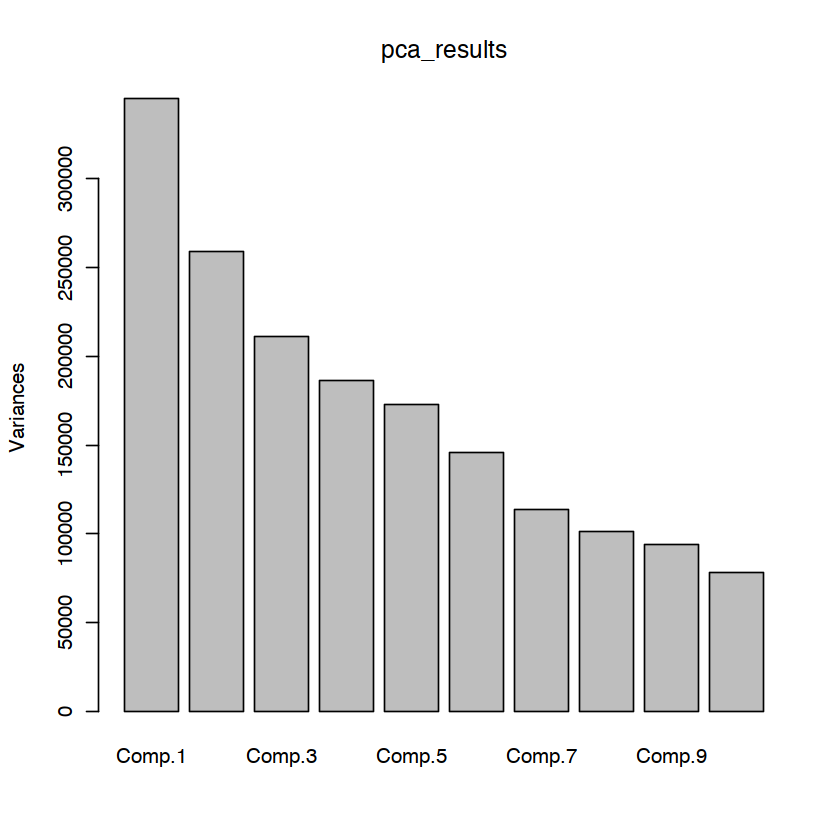

In [19]:
library(ggplot2)
library(dplyr)
library(plotly)

#Plot variance explained
plot(pca_results)

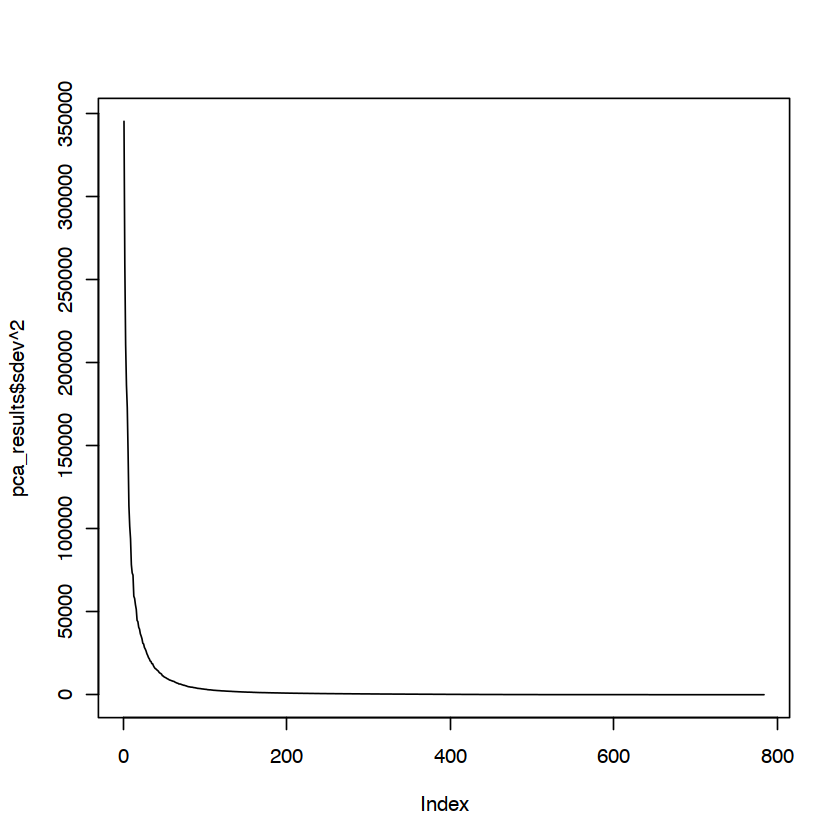

In [20]:
plot(pca_results$sdev^2, type = "l")

In [21]:
#Percent of variation explained
cumsum(pca_results$sdev^2 / sum(pca_results$sdev^2))

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
0.1004766 0.1759215 0.2373267 0.2915847 0.3418972 0.3843609 0.4174749 0.4469778 
   Comp.9   Comp.10   Comp.11   Comp.12   Comp.13   Comp.14   Comp.15   Comp.16 
0.4742764 0.4970568 0.5183958 0.5393478 0.5566068 0.5734644 0.5892251 0.6041707 
  Comp.17   Comp.18   Comp.19   Comp.20   Comp.21   Comp.22   Comp.23   Comp.24 
0.6171958 0.6299805 0.6417817 0.6532647 0.6639288 0.6742005 0.6839977 0.6930164 
  Comp.25   Comp.26   Comp.27   Comp.28   Comp.29   Comp.30   Comp.31   Comp.32 
0.7018987 0.7101644 0.7181618 0.7258202 0.7329953 0.7398679 0.7463593 0.7526309 
  Comp.33   Comp.34   Comp.35   Comp.36   Comp.37   Comp.38   Comp.39   Comp.40 
0.7585338 0.7643514 0.7697987 0.7752153 0.7802877 0.7850989 0.7897006 0.7942158 
  Comp.41   Comp.42   Comp.43   Comp.44   Comp.45   Comp.46   Comp.47   Comp.48 
0.7985861 0.8028297 0.8069594 0.8108557 0.8146381 0.8183427 0.8219255 0.8252428 
  Comp.49   Comp.50   Comp.51   Comp.52   Comp.53   Comp.54   Comp.55   Comp.56 
0.8285110 0.8316294 0.8346701 0.8376485 0.8405333 0.8433204 0.8460506 0.8486802 
  Comp.57   Comp.58   Comp.59   Comp.60   Comp.61   Comp.62   Comp.63   Comp.64 
0.8512298 0.8537600 0.8562055 0.8586200 0.8609636 0.8632970 0.8655277 0.8676830 
  Comp.65   Comp.66   Comp.67   Comp.68   Comp.69   Comp.70   Comp.71   Comp.72 
0.8697712 0.8717945 0.8737897 0.8756758 0.8775477 0.8794044 0.8812103 0.8829540 
  Comp.73   Comp.74   Comp.75   Comp.76   Comp.77   Comp.78   Comp.79   Comp.80 
0.8846585 0.8863018 0.8879424 0.8895162 0.8910618 0.8925447 0.8939752 0.8953664 
  Comp.81   Comp.82   Comp.83   Comp.84   Comp.85   Comp.86   Comp.87   Comp.88 
0.8967440 0.8980858 0.8994040 0.9007162 0.9020114 0.9032622 0.9044879 0.9057039 
  Comp.89   Comp.90   Comp.91   Comp.92   Comp.93   Comp.94   Comp.95   Comp.96 
0.9068747 0.9080273 0.9091327 0.9102316 0.9113083 0.9123805 0.9134271 0.9144478 
  Comp.97   Comp.98   Comp.99  Comp.100  Comp.101  Comp.102  Comp.103  Comp.104 
0.9154505 0.9164421 0.9174067 0.9183554 0.9192902 0.9202152 0.9210966 0.9219642 
 Comp.105  Comp.106  Comp.107  Comp.108  Comp.109  Comp.110  Comp.111  Comp.112 
0.9228164 0.9236673 0.9245077 0.9253274 0.9261325 0.9269145 0.9276819 0.9284423 
 Comp.113  Comp.114  Comp.115  Comp.116  Comp.117  Comp.118  Comp.119  Comp.120 
0.9291954 0.9299322 0.9306591 0.9313739 0.9320844 0.9327852 0.9334730 0.9341418 
 Comp.121  Comp.122  Comp.123  Comp.124  Comp.125  Comp.126  Comp.127  Comp.128 
0.9348062 0.9354660 0.9361198 0.9367638 0.9373980 0.9380207 0.9386355 0.9392431 
 Comp.129  Comp.130  Comp.131  Comp.132  Comp.133  Comp.134  Comp.135  Comp.136 
0.9398430 0.9404379 0.9410261 0.9416071 0.9421813 0.9427399 0.9432947 0.9438413 
 Comp.137  Comp.138  Comp.139  Comp.140  Comp.141  Comp.142  Comp.143  Comp.144 
0.9443807 0.9449111 0.9454366 0.9459550 0.9464662 0.9469696 0.9474682 0.9479586 
 Comp.145  Comp.146  Comp.147  Comp.148  Comp.149  Comp.150  Comp.151  Comp.152 
0.9484454 0.9489215 0.9493955 0.9498606 0.9503231 0.9507794 0.9512263 0.9516673 
 Comp.153  Comp.154  Comp.155  Comp.156  Comp.157  Comp.158  Comp.159  Comp.160 
0.9521068 0.9525431 0.9529773 0.9534074 0.9538332 0.9542496 0.9546569 0.9550582 
 Comp.161  Comp.162  Comp.163  Comp.164  Comp.165  Comp.166  Comp.167  Comp.168 
0.9554580 0.9558492 0.9562376 0.9566190 0.9569973 0.9573699 0.9577377 0.9581036 
 Comp.169  Comp.170  Comp.171  Comp.172  Comp.173  Comp.174  Comp.175  Comp.176 
0.9584669 0.9588260 0.9591841 0.9595383 0.9598903 0.9602410 0.9605879 0.9609325 
 Comp.177  Comp.178  Comp.179  Comp.180  Comp.181  Comp.182  Comp.183  Comp.184 
0.9612712 0.9616063 0.9619368 0.9622661 0.9625922 0.9629135 0.9632339 0.9635517 
 Comp.185  Comp.186  Comp.187  Comp.188  Comp.189  Comp.190  Comp.191  Comp.192 
0.9638670 0.9641799 0.9644911 0.9648000 0.9651063 0.9654088 0.9657068 0.9660038 
 Comp.193  Comp.194  Comp.195  Comp.196  Comp.197  Comp.198  Comp.199  Comp.200 
0.9662967 0.9665859 0.9668738 0.96

I select the final dimension to be 9. This is a trade-off between training time and (possibly) prediction accuracy.

With this dimension, each training costs around 5s on my machine. Note that this number will be multiplied by 5 for 5-fold CV, and another factor of around 10 for hyperparameter search.

In [22]:
pca_projections = as.data.frame(x_train %*% loadings(pca_results)[, 1:9])
pca_projections_test = as.data.frame(x_test %*% loadings(pca_results)[, 1:9])

In [23]:
dat = pca_projections
dat['y'] = as.factor(y_train)

## 1. SVM model
With traning data saved in dat, we will fit support vector machine classifiers to the training data, with linear, radial and polynomial kernels, with different values of gamma and degree and cost. And we use 5-fold cross-validation to select the best model, apply the selected model to the test data, and report the results.

In [25]:
library(e1071)

### (1) Linear kernel

We directly use $5$-fold CV to choose the best model over `cost`. Best performance is achieved when `cost=1`.

In [28]:
set.seed(1)
tune_lr.out = tune(svm, y~.,
                 data=dat,kernel="linear", 
                 ranges=list(cost=c(0.01, 0.1, 1,5,10)),
                 tunecontrol=tune.control(sampling="cross", cross=5))
summary(tune_lr.out)


Parameter tuning of ‘svm’:

- sampling method: 5-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.1646 

- Detailed performance results:
   cost  error  dispersion
1  0.01 0.1759 0.007223226
2  0.10 0.1671 0.007692529
3  1.00 0.1646 0.006940821
4  5.00 0.1654 0.006318623
5 10.00 0.1653 0.006160357


In [29]:
svmfit_linear = svm(y ~ ., data = dat, kernel = "linear", cost = 1)

### (2) Radial kernel

Best performance is achieved when `cost=5`, `gamma=0.1`.

In [31]:
tune_ra.out = tune(svm, y ~ .,
                    data = dat, kernel = "radial",
                    ranges = list(cost = c(0.1, 1, 5), gamma = c(0.1, 1, 5)), 
                    tunecontrol = tune.control(sampling = "cross", cross = 5))
summary(tune_ra.out)


Parameter tuning of ‘svm’:

- sampling method: 5-fold cross validation 

- best parameters:
 cost gamma
    5   0.1

- best performance: 0.0844 

- Detailed performance results:
  cost gamma  error  dispersion
1  0.1   0.1 0.1277 0.006544081
2  1.0   0.1 0.0939 0.011447707
3  5.0   0.1 0.0844 0.006608706
4  0.1   1.0 0.3245 0.027524989
5  1.0   1.0 0.0956 0.006922788
6  5.0   1.0 0.0995 0.004962358
7  0.1   5.0 0.8214 0.019982492
8  1.0   5.0 0.5084 0.035407273
9  5.0   5.0 0.4703 0.032493461


In [32]:
svmfit_radial = svm(y ~ ., data = dat, kernel = "radial", cost = 5, gamma = .1)

### (3) Polynomial kernel

In [33]:
svm(y ~ ., data=dat, kernel='polynomial', cost = 5, degree=3, gamma=.1)


Call:
svm(formula = y ~ ., data = dat, kernel = "polynomial", cost = 5, 
    degree = 3, gamma = 0.1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  5 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  3049


We fix `cost=5` and `gamma=0.1`, best performance is achieved when `degree=3`.

In [34]:
tune_pl.out = tune(svm, y ~ .,
                data = dat, kernel = "polynomial",
                cost = 5, 
                gamma = .1,
                ranges = list(degree=1:7), 
                tunecontrol = tune.control(sampling = "cross", cross = 5))
summary(tune_pl.out)


Parameter tuning of ‘svm’:

- sampling method: 5-fold cross validation 

- best parameters:
 degree
      3

- best performance: 0.0989 

- Detailed performance results:
  degree  error  dispersion
1      1 0.1627 0.004177320
2      2 0.1709 0.009106316
3      3 0.0989 0.003798026
4      4 0.1585 0.008944272
5      5 0.1213 0.006676451
6      6 0.2045 0.013004807
7      7 0.1934 0.010352536


We fix `gamma=0.1` and `degree=3`, best performance is achieved when `cost=5`.

In [36]:
tune_pl_1.out = tune(svm, y ~ .,
                data = dat, kernel = "polynomial",
                gamma = .1,
                degree = 3,
                ranges = list(cost=c(.1, 1, 5, 10)), 
                tunecontrol = tune.control(sampling = "cross", cross = 5))
summary(tune_pl_1.out)


Parameter tuning of ‘svm’:

- sampling method: 5-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.0988 

- Detailed performance results:
  cost  error  dispersion
1  0.1 0.1627 0.006350197
2  1.0 0.1079 0.006994641
3  5.0 0.0988 0.003946517
4 10.0 0.0989 0.006693280


We fix `cost=5` and `degree=3`, best performance is achieved when `gamma=0.1`.

In [38]:
tune_pl_2.out = tune(svm, y ~ .,
                data = dat, kernel = "polynomial",
                degree = 3,
                cost = 5,
                ranges = list(gamma = c(.1, .5, 1, 2, 4)),
                tunecontrol = tune.control(sampling = "cross", cross = 5))
summary(tune_pl_2.out)


Parameter tuning of ‘svm’:

- sampling method: 5-fold cross validation 

- best parameters:
 gamma
   0.1

- best performance: 0.0997 

- Detailed performance results:
  gamma  error  dispersion
1   0.1 0.0997 0.008051397
2   0.5 0.1251 0.002583602
3   1.0 0.1306 0.006886581
4   2.0 0.1317 0.004353160
5   4.0 0.1330 0.007288690


In [39]:
svmfit_polynomial = svm(y ~ .,data = dat, kernel = "polynomial", cost = 5, gamma = 0.1, degree = 3)

### Prediction summary

Next we apply the selected model to the test data, and report the results.

In [41]:
y_pred_linear = predict(svmfit_linear, pca_projections_test)
y_pred_radial = predict(svmfit_radial, pca_projections_test)
y_pred_polynomial = predict(svmfit_polynomial, pca_projections_test)

In [42]:
# accuracy is reported in the dataframe
data.frame(linear = mean(y_pred_linear == y_test),
           radial = mean(y_pred_radial == y_test),
           polynomial = mean(y_pred_polynomial == y_test))

linear,radial,polynomial
<dbl>,<dbl>,<dbl>
0.8233833,0.9054833,0.8919667


As we can see Radial kernal achieve the highest accuracy.